In [ ]:
import os
from pathlib import Path

kaggle_dir = Path.home() / '.kaggle'
kaggle_dir.mkdir(exist_ok=True)


kaggle_json = f'''{{
  "username": "{'gauravadlakha1509'}",
  "key": "{'edd872adf89cbbd17cec3d1f6f05a462'}"
}}'''

with open(kaggle_dir / 'kaggle.json', 'w') as f:
    f.write(kaggle_json)

os.chmod(kaggle_dir / 'kaggle.json', 0o600)

!kaggle competitions download -c titanic
# !unzip /content/us-patent-phrase-to-phrase-matching.zip

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


/usr/local/lib/python3.11/site-packages/lancedb/__init__.py:220: UserWarning: lance is not fork-safe. If you are using multiprocessing, use spawn instead.
  warnings.warn(


In [ ]:
from pathlib import Path

titanic_dir = Path('titanic_data')
titanic_dir.mkdir(exist_ok=True)

with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall(titanic_dir)



In [ ]:
titanic_dir.ls()

(#3) [Path('titanic_data/gender_submission.csv'),Path('titanic_data/test.csv'),Path('titanic_data/train.csv')]

In [ ]:
from utils import *

In [ ]:
df = pd.read_csv('titanic_data/train.csv')


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,nan,C


In [ ]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,G6,S
freq,1,577,7,4,644


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 12)

In [ ]:
df.isna().sum()/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
modes= df.mode().iloc[0]

In [ ]:
df.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000,3.000,"Abbing, Mr. Anthony",male,24.000,0.000,0.000,1601,8.050,B96 B98,S
1,2,nan,nan,"Abbott, Mr. Rossmore Edward",nan,nan,nan,nan,347082,nan,C23 C25 C27,nan
2,3,nan,nan,"Abbott, Mrs. Stanton (Rosa Hunt)",nan,nan,nan,nan,CA. 2343,nan,G6,nan
3,4,nan,nan,"Abelson, Mr. Samuel",nan,nan,nan,nan,nan,nan,nan,nan
4,5,nan,nan,"Abelson, Mrs. Samuel (Hannah Wizosky)",nan,nan,nan,nan,nan,nan,nan,nan
5,6,nan,nan,"Adahl, Mr. Mauritz Nils Martin",nan,nan,nan,nan,nan,nan,nan,nan
6,7,nan,nan,"Adams, Mr. John",nan,nan,nan,nan,nan,nan,nan,nan
7,8,nan,nan,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",nan,nan,nan,nan,nan,nan,nan,nan
8,9,nan,nan,"Aks, Mrs. Sam (Leah Rosen)",nan,nan,nan,nan,nan,nan,nan,nan
9,10,nan,nan,"Albimona, Mr. Nassef Cassem",nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
df.Ticket.value_counts(normalize=True)

Ticket
1601         0.007856
CA. 2343     0.007856
347082       0.007856
3101295      0.006734
CA 2144      0.006734
               ...   
A/5 21172    0.001122
349219       0.001122
234818       0.001122
345364       0.001122
A/5 2466     0.001122
Name: proportion, Length: 681, dtype: float64

In [ ]:
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [ ]:
df.fillna(modes,inplace=True)

In [ ]:
df.isna().sum()/891

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

In [ ]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,891.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,28.567,0.523,0.382,32.204
std,257.354,0.487,0.836,13.200,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,22.000,0.000,0.000,7.910
50%,446.000,0.000,3.000,24.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,35.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

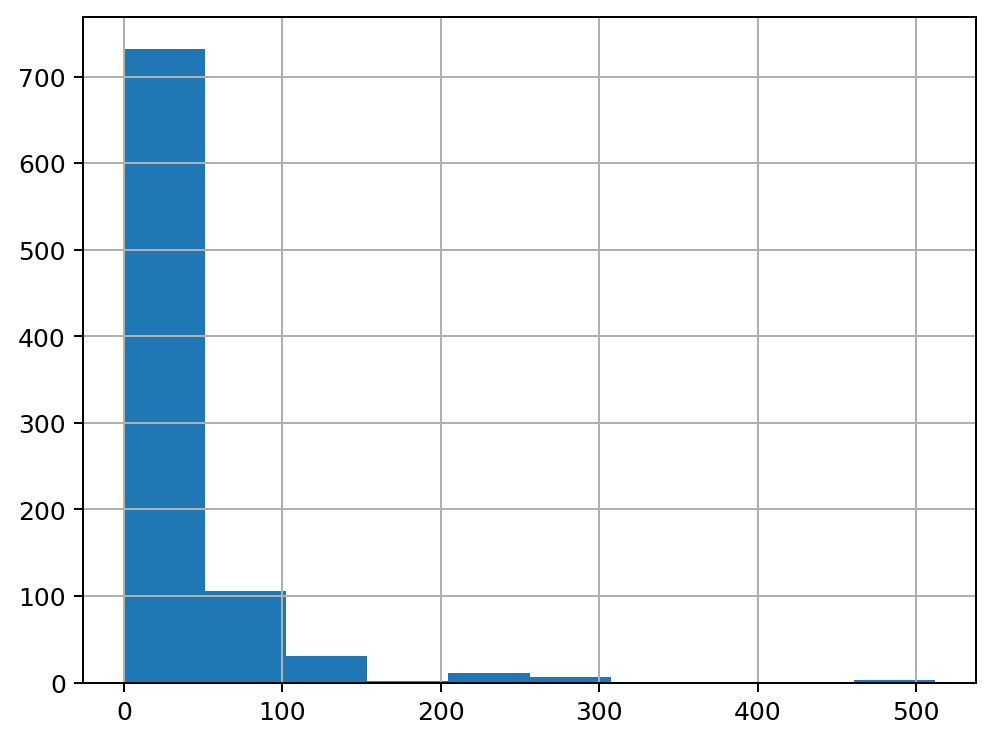

<Axes: >

In [ ]:
df['Fare'].hist()

In [ ]:
df['LogFare'] = np.log(df['Fare']+1)


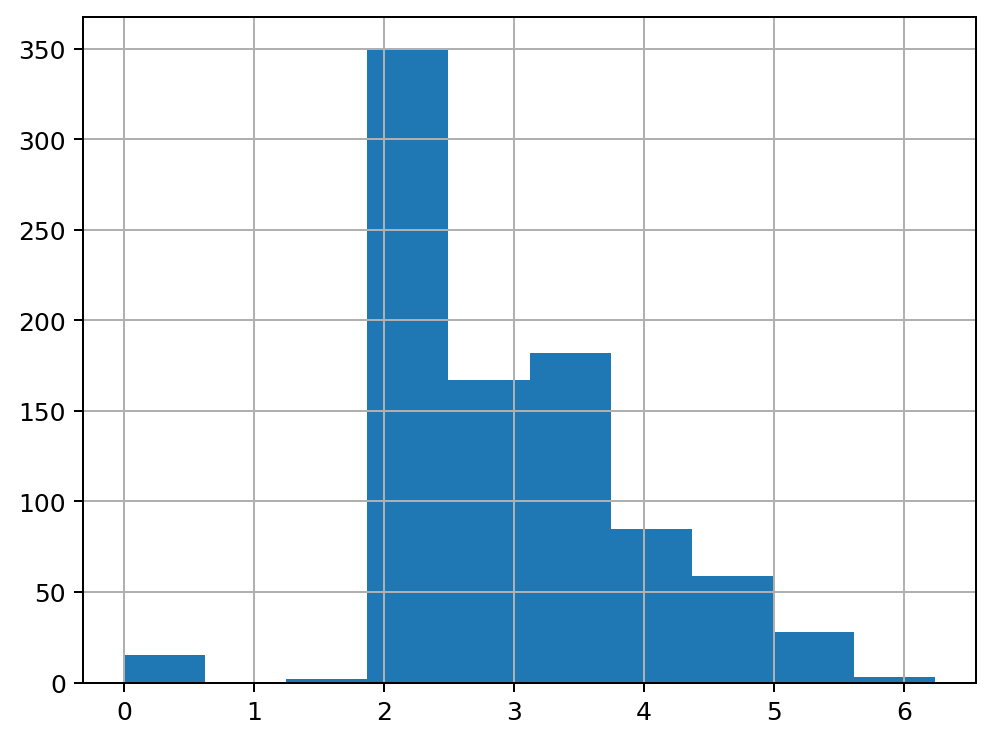

<Axes: >

In [ ]:
df['LogFare'].hist()

In [ ]:
df = pd.get_dummies(df, columns=['Sex','Pclass','Embarked'])


In [ ]:
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,B96 B98,2.110,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.000,1,0,PC 17599,71.283,C85,4.281,True,False,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,B96 B98,2.189,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,3.991,True,False,True,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,B96 B98,2.203,False,True,False,False,True,False,False,True
5,6,0,"Moran, Mr. James",24.000,0,0,330877,8.458,B96 B98,2.247,False,True,False,False,True,False,True,False
6,7,0,"McCarthy, Mr. Timothy J",54.000,0,0,17463,51.862,E46,3.968,False,True,True,False,False,False,False,True
7,8,0,"Palsson, Master. Gosta Leonard",2.000,3,1,349909,21.075,B96 B98,3.094,False,True,False,False,True,False,False,True
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000,0,2,347742,11.133,B96 B98,2.496,True,False,False,False,True,False,False,True
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.000,1,0,237736,30.071,B96 B98,3.436,True,False,False,True,False,True,False,False


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df.columns[-8:]

Index(['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [ ]:
addded_col =df.columns[-8:]

In [ ]:
addded_col

Index(['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [ ]:
addded_col =addded_col.to_list()

In [ ]:
addded_col

['Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [ ]:
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,B96 B98,2.110,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.000,1,0,PC 17599,71.283,C85,4.281,True,False,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,B96 B98,2.189,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,3.991,True,False,True,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,B96 B98,2.203,False,True,False,False,True,False,False,True
5,6,0,"Moran, Mr. James",24.000,0,0,330877,8.458,B96 B98,2.247,False,True,False,False,True,False,True,False
6,7,0,"McCarthy, Mr. Timothy J",54.000,0,0,17463,51.862,E46,3.968,False,True,True,False,False,False,False,True
7,8,0,"Palsson, Master. Gosta Leonard",2.000,3,1,349909,21.075,B96 B98,3.094,False,True,False,False,True,False,False,True
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000,0,2,347742,11.133,B96 B98,2.496,True,False,False,False,True,False,False,True
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.000,1,0,237736,30.071,B96 B98,3.436,True,False,False,True,False,True,False,False


In [ ]:
df[addded_col]

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True,False,False,True
1,True,False,True,False,False,True,False,False
2,True,False,False,False,True,False,False,True
3,True,False,True,False,False,False,False,True
4,False,True,False,False,True,False,False,True
5,False,True,False,False,True,False,True,False
6,False,True,True,False,False,False,False,True
7,False,True,False,False,True,False,False,True
8,True,False,False,False,True,False,False,True
9,True,False,False,True,False,True,False,False


In [ ]:
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,B96 B98,2.110,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.000,1,0,PC 17599,71.283,C85,4.281,True,False,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,B96 B98,2.189,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,3.991,True,False,True,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,B96 B98,2.203,False,True,False,False,True,False,False,True
5,6,0,"Moran, Mr. James",24.000,0,0,330877,8.458,B96 B98,2.247,False,True,False,False,True,False,True,False
6,7,0,"McCarthy, Mr. Timothy J",54.000,0,0,17463,51.862,E46,3.968,False,True,True,False,False,False,False,True
7,8,0,"Palsson, Master. Gosta Leonard",2.000,3,1,349909,21.075,B96 B98,3.094,False,True,False,False,True,False,False,True
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000,0,2,347742,11.133,B96 B98,2.496,True,False,False,False,True,False,False,True
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.000,1,0,237736,30.071,B96 B98,3.436,True,False,False,True,False,True,False,False


In [ ]:
t_dep = torch.tensor(df.Survived)

In [ ]:
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 

In [ ]:
inp_col = ['Age', 'SibSp', 'Parch','LogFare'] + addded_col


In [ ]:
inp_col

['Age',
 'SibSp',
 'Parch',
 'LogFare',
 'Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [ ]:
for col in addded_col:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)

t_inp = torch.tensor(df[inp_col].values, dtype=torch.float)

In [ ]:
t_inp

tensor([[22.00,  1.00,  0.00,  2.11,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [38.00,  1.00,  0.00,  4.28,  1.00,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00],
        [26.00,  0.00,  0.00,  2.19,  1.00,  0.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [35.00,  1.00,  0.00,  3.99,  1.00,  0.00,  1.00,  0.00,  0.00,  0.00,  0.00,  1.00],
        [35.00,  0.00,  0.00,  2.20,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [24.00,  0.00,  0.00,  2.25,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  1.00,  0.00],
        [54.00,  0.00,  0.00,  3.97,  0.00,  1.00,  1.00,  0.00,  0.00,  0.00,  0.00,  1.00],
        ...,
        [25.00,  0.00,  0.00,  2.09,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [39.00,  0.00,  5.00,  3.41,  1.00,  0.00,  0.00,  0.00,  1.00,  0.00,  1.00,  0.00],
        [27.00,  0.00,  0.00,  2.64,  0.00,  1.00,  0.00,  1.00,  0.00,  0.00,  0.00,  1.00],
        [19.00,  0.00,  0.00,  3.43,  1.00,  0.

In [ ]:
t_inp.dtype

torch.float32

In [ ]:
t_inp.shape

torch.Size([891, 12])

In [ ]:
t_dep.dtype

torch.int64

# Linear model

In [ ]:
torch.manual_seed(42)

coff = torch.randn(t_inp.shape[1]) - 0.5

# (t_inp * t_dep[:,None


In [ ]:
torch.randn(10) - 0.5

tensor([ 0.61, -2.19, -1.49,  0.46,  0.82,  0.32, -1.27, -1.25,  0.85,  0.19])

In [ ]:
t_inp.shape[1]

12

In [ ]:
coff =coff[:,None]

In [ ]:
(t_inp * coff)

tensor([[-3.59, -0.37, -0.00, -0.57, -0.00, -0.69,  0.00, -0.00, -0.04, -0.00,  0.00,  0.31],
        [-6.21, -0.37, -0.00, -1.15, -1.62, -0.00,  1.71, -0.00, -0.00, -0.23,  0.00,  0.00],
        [-4.25, -0.00, -0.00, -0.59, -1.62, -0.00,  0.00, -0.00, -0.04, -0.00,  0.00,  0.31],
        [-5.72, -0.37, -0.00, -1.08, -1.62, -0.00,  1.71, -0.00, -0.00, -0.00,  0.00,  0.31],
        [-5.72, -0.00, -0.00, -0.59, -0.00, -0.69,  0.00, -0.00, -0.04, -0.00,  0.00,  0.31],
        [-3.92, -0.00, -0.00, -0.61, -0.00, -0.69,  0.00, -0.00, -0.04, -0.00,  0.03,  0.00],
        [-8.82, -0.00, -0.00, -1.07, -0.00, -0.69,  1.71, -0.00, -0.00, -0.00,  0.00,  0.31],
        ...,
        [-4.08, -0.00, -0.00, -0.56, -0.00, -0.69,  0.00, -0.00, -0.04, -0.00,  0.00,  0.31],
        [-6.37, -0.00, -1.33, -0.92, -1.62, -0.00,  0.00, -0.00, -0.04, -0.00,  0.03,  0.00],
        [-4.41, -0.00, -0.00, -0.71, -0.00, -0.69,  0.00, -1.14, -0.00, -0.00,  0.00,  0.31],
        [-3.10, -0.00, -0.00, -0.93, -1.62, -0.

In [ ]:
coff.shape

torch.Size([12])

In [ ]:
t_inp.shape

torch.Size([891, 12])

In [ ]:
preds= (t_inp * coff).sum(axis=1)

In [ ]:
(t_inp * coff)[0]

tensor([-3.59, -0.37, -0.00, -0.57, -0.00, -0.69,  0.00, -0.00, -0.04, -0.00,  0.00,  0.31])

In [ ]:
preds.shape

torch.Size([891])

In [ ]:
preds[0:5]

tensor([-4.95, -7.88, -6.19, -6.77, -6.73])

In [ ]:
torch.abs(preds - t_dep)**2

tensor([ 24.49,  78.83,  51.67,  60.35,  45.23,  27.20,  73.23,   8.74,  63.45,  57.42,  19.51, 120.37,  18.28,  88.74,  17.86, 174.18,
         13.58,  51.07,  57.45,  54.49,  65.93,  77.07,  32.14,  27.16,  23.74, 125.31,  29.65,  24.21,  50.90,  24.25,  44.20,  46.03,
         50.85, 167.75,  28.59,  48.58,  41.54,  19.70,  33.96,  38.77,  79.01,  65.05,  29.88,  40.93,  39.92,  24.29,  32.91,  50.85,
         41.74,  29.74,  18.56,  19.64, 114.37,  89.25, 125.63,  20.78,  56.85,  38.19,  36.92,  31.83,  26.20,  63.94,  57.54,  13.11,
         16.29,  52.78,  78.25,  16.94,  59.82,  36.19,  54.75,  54.69,  37.29,  39.85,  59.81,  25.81,  24.25,  24.29,  16.80,  63.24,
         21.43,  46.04,  50.86,  18.37,  47.42,  92.47,  26.60,  24.29,  56.40,  24.29,  33.01,  18.23,  58.77,  40.86, 112.78,  24.29,
        138.52,  28.68, 102.55,  69.35,  42.43,  24.25,  12.53,  41.16,  60.69,  31.11,  40.49,  35.05,  51.99,  60.63,  54.98,  28.85,
         21.18,  31.71,  29.25,  19.67, 163.53, 

In [ ]:
def loss(preds,t_dep):  return torch.abs(preds - t_dep)**2

In [ ]:
# loss(preds,t_dep)

In [ ]:
(t_inp * coff)

tensor([[-3.59, -0.37, -0.00, -0.57, -0.00, -0.69,  0.00, -0.00, -0.04, -0.00,  0.00,  0.31],
        [-6.21, -0.37, -0.00, -1.15, -1.62, -0.00,  1.71, -0.00, -0.00, -0.23,  0.00,  0.00],
        [-4.25, -0.00, -0.00, -0.59, -1.62, -0.00,  0.00, -0.00, -0.04, -0.00,  0.00,  0.31],
        [-5.72, -0.37, -0.00, -1.08, -1.62, -0.00,  1.71, -0.00, -0.00, -0.00,  0.00,  0.31],
        [-5.72, -0.00, -0.00, -0.59, -0.00, -0.69,  0.00, -0.00, -0.04, -0.00,  0.00,  0.31],
        [-3.92, -0.00, -0.00, -0.61, -0.00, -0.69,  0.00, -0.00, -0.04, -0.00,  0.03,  0.00],
        [-8.82, -0.00, -0.00, -1.07, -0.00, -0.69,  1.71, -0.00, -0.00, -0.00,  0.00,  0.31],
        ...,
        [-4.08, -0.00, -0.00, -0.56, -0.00, -0.69,  0.00, -0.00, -0.04, -0.00,  0.00,  0.31],
        [-6.37, -0.00, -1.33, -0.92, -1.62, -0.00,  0.00, -0.00, -0.04, -0.00,  0.03,  0.00],
        [-4.41, -0.00, -0.00, -0.71, -0.00, -0.69,  0.00, -1.14, -0.00, -0.00,  0.00,  0.31],
        [-3.10, -0.00, -0.00, -0.93, -1.62, -0.

In [ ]:
t_inp

tensor([[22.00,  1.00,  0.00,  2.11,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [38.00,  1.00,  0.00,  4.28,  1.00,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00],
        [26.00,  0.00,  0.00,  2.19,  1.00,  0.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [35.00,  1.00,  0.00,  3.99,  1.00,  0.00,  1.00,  0.00,  0.00,  0.00,  0.00,  1.00],
        [35.00,  0.00,  0.00,  2.20,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [24.00,  0.00,  0.00,  2.25,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  1.00,  0.00],
        [54.00,  0.00,  0.00,  3.97,  0.00,  1.00,  1.00,  0.00,  0.00,  0.00,  0.00,  1.00],
        ...,
        [25.00,  0.00,  0.00,  2.09,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [39.00,  0.00,  5.00,  3.41,  1.00,  0.00,  0.00,  0.00,  1.00,  0.00,  1.00,  0.00],
        [27.00,  0.00,  0.00,  2.64,  0.00,  1.00,  0.00,  1.00,  0.00,  0.00,  0.00,  1.00],
        [19.00,  0.00,  0.00,  3.43,  1.00,  0.

In [ ]:
t_inp.max(dim=0)

torch.return_types.max(
values=tensor([80.00,  8.00,  6.00,  6.24,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00]),
indices=tensor([630, 159, 678, 258,   1,   0,   1,   9,   0,   1,   5,   0]))

In [ ]:
values,indices = t_inp.max(dim=0)

In [ ]:
values

tensor([80.00,  8.00,  6.00,  6.24,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00])

In [ ]:
t_inp/values

tensor([[0.28, 0.12, 0.00, 0.34, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
        [0.47, 0.12, 0.00, 0.69, 1.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00],
        [0.32, 0.00, 0.00, 0.35, 1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
        [0.44, 0.12, 0.00, 0.64, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00],
        [0.44, 0.00, 0.00, 0.35, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
        [0.30, 0.00, 0.00, 0.36, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00],
        [0.68, 0.00, 0.00, 0.64, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00],
        ...,
        [0.31, 0.00, 0.00, 0.33, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
        [0.49, 0.00, 0.83, 0.55, 1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 1.00, 0.00],
        [0.34, 0.00, 0.00, 0.42, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 1.00],
        [0.24, 0.00, 0.00, 0.55, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00],
        [0.30, 0.12, 0.33, 0.51, 1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
   

In [ ]:
t_inp = t_inp/values

In [ ]:
t_dep.shape

torch.Size([891])

In [ ]:
t_inp.shape

torch.Size([891, 12])

In [ ]:
preds = (t_inp * coff).sum(axis=1)

In [ ]:
preds

tensor([    -0.60,     -0.46,     -1.50,      0.10,     -0.58,     -0.84,      1.05,     -0.74,     -1.60,     -3.22,     -1.57,      0.13,
            -0.55,     -0.91,     -1.47,     -2.69,     -1.07,     -1.68,     -1.59,     -2.03,     -1.73,     -1.70,     -1.75,      1.12,
            -1.69,     -1.85,     -1.10,      0.82,     -1.77,     -0.56,      0.56,     -0.46,     -1.77,     -1.76,      0.49,      1.03,
            -1.10,     -0.55,     -1.61,     -2.08,     -1.58,     -2.69,     -1.10,     -3.30,     -1.76,     -0.56,     -0.91,     -1.77,
            -1.23,     -1.56,     -0.82,     -0.55,     -0.48,     -2.70,      0.43,      1.13,     -2.60,     -1.11,     -2.74,     -0.93,
            -1.09,      0.13,      1.00,     -0.80,      0.60,     -1.22,     -2.62,     -0.55,     -1.76,     -0.66,     -1.69,     -1.87,
            -1.74,     -1.18,     -0.66,     -0.56,     -0.56,     -0.56,     -1.75,     -1.53,     -0.56,     -0.58,     -1.77,      1.11,
            -2.59,  

In [ ]:
torch.abs(preds - t_dep).mean()

tensor(1.44)

In [ ]:
def calc_pred(t_inps,coffs) : return (t_inps * coffs).sum(axis=1)
def calc_loss(preds,t_deps) : return torch.abs(preds - t_deps).mean()


In [ ]:
coff

tensor([-0.16, -0.37, -0.27, -0.27, -1.62, -0.69,  1.71, -1.14, -0.04, -0.23,  0.03,  0.31])

In [ ]:
coff.requires_grad_(True)

tensor([-0.16, -0.37, -0.27, -0.27, -1.62, -0.69,  1.71, -1.14, -0.04, -0.23,  0.03,  0.31], requires_grad=True)

In [ ]:
coff

tensor([-0.16, -0.37, -0.27, -0.27, -1.62, -0.69,  1.71, -1.14, -0.04, -0.23,  0.03,  0.31], requires_grad=True)

In [ ]:
preds= calc_pred(t_inp,coff)

In [ ]:
loss= calc_loss(preds,t_dep)

In [ ]:
loss

tensor(1.44, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()

In [ ]:
coff.grad

tensor([-0.25, -0.06, -0.05, -0.34, -0.35, -0.42, -0.02, -0.21, -0.55, -0.13, -0.08, -0.56])

In [ ]:
with torch.no_grad():
    coff.sub_(0.1 * coff.grad)
    print(calc_loss(calc_pred(t_inp,coff),t_dep))



    

tensor(1.33)


In [ ]:

preds= calc_pred(t_inp,coff)
loss= calc_loss(preds,t_dep)
loss = loss.backward()

with torch.no_grad():
    coff.sub_(coff.grad *0.1)
    print(calc_loss(calc_pred(t_inp,coff),t_dep))




tensor(1.10)


In [ ]:
coff = torch.randn(t_inp.shape[1]) - 0.5
coff.requires_grad_()

def one_epoch():
    preds= calc_pred(t_inp,coff)
    loss= calc_loss(preds,t_dep)
    print(loss)
    loss = loss.backward()
    with torch.no_grad():coff.sub_(coff.grad *0.1)


for i in range(10): one_epoch()

tensor(1.75, grad_fn=<MeanBackward0>)
tensor(1.70, grad_fn=<MeanBackward0>)
tensor(1.61, grad_fn=<MeanBackward0>)
tensor(1.49, grad_fn=<MeanBackward0>)
tensor(1.33, grad_fn=<MeanBackward0>)
tensor(1.18, grad_fn=<MeanBackward0>)
tensor(1.05, grad_fn=<MeanBackward0>)
tensor(0.98, grad_fn=<MeanBackward0>)
tensor(0.94, grad_fn=<MeanBackward0>)
tensor(0.90, grad_fn=<MeanBackward0>)


In [ ]:
from fastai.data.transforms import *

train_df , val_df = RandomSplitter()(df)

In [ ]:
train_df

(#713) [np.int64(631),np.int64(331),np.int64(492),np.int64(84),np.int64(389),np.int64(730),np.int64(315),np.int64(716),np.int64(564),np.int64(762),np.int64(698),np.int64(236),np.int64(208),np.int64(390),np.int64(463),np.int64(116),np.int64(794),np.int64(20),np.int64(359),np.int64(568)...]

In [ ]:
train_df

(#713) [np.int64(631),np.int64(331),np.int64(492),np.int64(84),np.int64(389),np.int64(730),np.int64(315),np.int64(716),np.int64(564),np.int64(762),np.int64(698),np.int64(236),np.int64(208),np.int64(390),np.int64(463),np.int64(116),np.int64(794),np.int64(20),np.int64(359),np.int64(568)...]

In [ ]:
# use sklearn to get tain and valid df from df
from sklearn.model_selection import train_test_split
train_df , val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
331,332,0,"Partner, Mr. Austen",45.500,0,0,113043,28.500,C124,3.384,0,1,1,0,0,0,0,1
733,734,0,"Berriman, Mr. William John",23.000,0,0,28425,13.000,B96 B98,2.639,0,1,0,1,0,0,0,1
382,383,0,"Tikkanen, Mr. Juho",32.000,0,0,STON/O 2. 3101293,7.925,B96 B98,2.189,0,1,0,0,1,0,0,1
704,705,0,"Hansen, Mr. Henrik Juul",26.000,1,0,350025,7.854,B96 B98,2.181,0,1,0,0,1,0,0,1
813,814,0,"Andersson, Miss. Ebba Iris Alfrida",6.000,4,2,347082,31.275,B96 B98,3.474,1,0,0,0,1,0,0,1
118,119,0,"Baxter, Mr. Quigg Edmond",24.000,0,1,PC 17558,247.521,B58 B60,5.516,0,1,1,0,0,1,0,0
536,537,0,"Butt, Major. Archibald Willingham",45.000,0,0,113050,26.550,B38,3.316,0,1,1,0,0,0,0,1
361,362,0,"del Carlo, Mr. Sebastiano",29.000,1,0,SC/PARIS 2167,27.721,B96 B98,3.358,0,1,0,1,0,1,0,0
29,30,0,"Todoroff, Mr. Lalio",24.000,0,0,349216,7.896,B96 B98,2.186,0,1,0,0,1,0,0,1
55,56,1,"Woolner, Mr. Hugh",24.000,0,0,19947,35.500,C52,3.597,0,1,1,0,0,0,0,1


In [ ]:
inp_col

['Age',
 'SibSp',
 'Parch',
 'LogFare',
 'Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [ ]:
train_df[inp_col]

,Age,SibSp,Parch,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
331,45.500,0,0,3.384,0,1,1,0,0,0,0,1
733,23.000,0,0,2.639,0,1,0,1,0,0,0,1
382,32.000,0,0,2.189,0,1,0,0,1,0,0,1
704,26.000,1,0,2.181,0,1,0,0,1,0,0,1
813,6.000,4,2,3.474,1,0,0,0,1,0,0,1
118,24.000,0,1,5.516,0,1,1,0,0,1,0,0
536,45.000,0,0,3.316,0,1,1,0,0,0,0,1
361,29.000,1,0,3.358,0,1,0,1,0,1,0,0
29,24.000,0,0,2.186,0,1,0,0,1,0,0,1
55,24.000,0,0,3.597,0,1,1,0,0,0,0,1


In [ ]:
x_train, y_train = torch.tensor(train_df[inp_col].values),torch.tensor(train_df['Survived'].values)

In [ ]:
train_df = torch.tensor(train_df[inp_col].values)

In [ ]:
train_df.dtype

torch.float64

In [ ]:
x_train

tensor([[45.50,  0.00,  0.00,  3.38,  0.00,  1.00,  1.00,  0.00,  0.00,  0.00,  0.00,  1.00],
        [23.00,  0.00,  0.00,  2.64,  0.00,  1.00,  0.00,  1.00,  0.00,  0.00,  0.00,  1.00],
        [32.00,  0.00,  0.00,  2.19,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [26.00,  1.00,  0.00,  2.18,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [ 6.00,  4.00,  2.00,  3.47,  1.00,  0.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [24.00,  0.00,  1.00,  5.52,  0.00,  1.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00],
        [45.00,  0.00,  0.00,  3.32,  0.00,  1.00,  1.00,  0.00,  0.00,  0.00,  0.00,  1.00],
        ...,
        [18.00,  1.00,  0.00,  5.43,  1.00,  0.00,  1.00,  0.00,  0.00,  1.00,  0.00,  0.00],
        [16.00,  5.00,  2.00,  3.87,  1.00,  0.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [21.00,  0.00,  0.00,  2.16,  1.00,  0.00,  0.00,  0.00,  1.00,  0.00,  0.00,  1.00],
        [24.00,  0.00,  0.00,  3.47,  0.00,  1.

In [ ]:
y_train

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 

In [ ]:
x_train.max(axis=0)

torch.return_types.max(
values=tensor([80.00,  8.00,  6.00,  6.24,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00], dtype=torch.float64),
indices=tensor([415, 232, 175, 367,   4,   0,   0,   1,   2,   5,  33,   0]))

In [ ]:
x_train.max(axis=0).values

tensor([80.00,  8.00,  6.00,  6.24,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00,  1.00], dtype=torch.float64)

In [ ]:
x_train / x_train.max(axis=0).values

tensor([[0.57, 0.00, 0.00, 0.54, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00],
        [0.29, 0.00, 0.00, 0.42, 0.00, 1.00, 0.00, 1.00, 0.00, 0.00, 0.00, 1.00],
        [0.40, 0.00, 0.00, 0.35, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
        [0.33, 0.12, 0.00, 0.35, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
        [0.07, 0.50, 0.33, 0.56, 1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
        [0.30, 0.00, 0.17, 0.88, 0.00, 1.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00],
        [0.56, 0.00, 0.00, 0.53, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00],
        ...,
        [0.23, 0.12, 0.00, 0.87, 1.00, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00],
        [0.20, 0.62, 0.33, 0.62, 1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
        [0.26, 0.00, 0.00, 0.35, 1.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
        [0.30, 0.00, 0.00, 0.56, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 1.00],
        [0.51, 0.25, 0.00, 0.44, 0.00, 1.00, 0.00, 0.00, 1.00, 0.00, 0.00, 1.00],
   

In [ ]:
coffs  = torch.randn(12,requires_grad=True) - 0.5

In [ ]:
coffs

tensor([     0.22,     -0.00,     -1.66,     -0.58,      0.75,     -1.12,     -0.77,     -1.02,      1.04,     -1.46,     -1.38,     -3.14],
       grad_fn=<SubBackward0>)

In [ ]:
preds = (x_train / x_train.max(axis=0).values) * coffs

In [ ]:
preds

tensor([[     0.12,     -0.00,     -0.00,     -0.32,      0.00,     -1.12,     -0.77,     -0.00,      0.00,     -0.00,     -0.00,     -3.14],
        [     0.06,     -0.00,     -0.00,     -0.25,      0.00,     -1.12,     -0.00,     -1.02,      0.00,     -0.00,     -0.00,     -3.14],
        [     0.09,     -0.00,     -0.00,     -0.20,      0.00,     -1.12,     -0.00,     -0.00,      1.04,     -0.00,     -0.00,     -3.14],
        [     0.07,     -0.00,     -0.00,     -0.20,      0.00,     -1.12,     -0.00,     -0.00,      1.04,     -0.00,     -0.00,     -3.14],
        [     0.02,     -0.00,     -0.55,     -0.32,      0.75,     -0.00,     -0.00,     -0.00,      1.04,     -0.00,     -0.00,     -3.14],
        [     0.07,     -0.00,     -0.28,     -0.52,      0.00,     -1.12,     -0.77,     -0.00,      0.00,     -1.46,     -0.00,     -0.00],
        [     0.12,     -0.00,     -0.00,     -0.31,      0.00,     -1.12,     -0.77,     -0.00,      0.00,     -0.00,     -0.00,     -3.14],
      

In [ ]:
preds.sum(axis=1)

tensor([-5.22, -5.46, -3.34, -3.35, -2.21, -4.08, -5.22, -3.84, -3.36, -5.30, -3.54, -3.70, -5.43, -3.37, -3.36, -3.86, -3.49, -1.89, -5.43,
        -3.49, -2.19, -3.24, -1.48, -4.25, -1.40, -1.69, -0.45, -3.36, -5.93, -1.73, -3.29, -4.34, -3.33, -1.73, -1.59, -1.86, -3.78, -3.94,
        -3.88, -3.92, -3.35, -3.36, -3.59, -3.73, -5.29, -3.35, -4.15, -3.36, -6.05, -3.65, -1.48, -5.48, -2.50, -1.60,  0.20, -3.37, -1.49,
        -3.40, -1.52, -1.88, -3.61, -3.17, -3.60, -1.68, -1.50, -1.64, -3.36, -3.36, -3.36, -3.36, -5.21, -1.51, -6.04, -1.60, -1.68, -5.35,
        -3.34, -3.36, -3.43, -5.41, -3.64, -3.57, -3.66, -3.55, -3.36, -4.97, -5.16, -3.38, -5.26, -5.99, -3.36, -1.85, -6.05, -5.75, -5.67,
        -3.91, -3.35, -3.38, -3.80, -2.10, -5.42, -3.36, -3.36, -3.55, -3.09, -3.80, -3.84,  0.28, -4.00, -5.86, -3.72, -3.37, -1.55, -0.49,
        -0.42, -3.37, -5.25, -1.65, -4.44, -1.73, -1.52, -1.83, -3.64, -5.84, -5.44, -3.38, -3.66, -3.41, -1.48, -5.18, -5.46, -5.33, -3.62,
        -3.79

In [ ]:
torch.abs(preds.sum(axis=1) - y_train ).mean()

tensor(3.67, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [ ]:
coffs.sub_(0.1 * coffs.grad)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[1], line 1
----> 1 coffs.sub_(0.1 * coffs.grad)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'


<ipython-input-1-0a906404093c>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  coffs.sub_(0.1 * coffs.grad)


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [ ]:
coffs

tensor([     0.22,     -0.00,     -1.66,     -0.58,      0.75,     -1.12,     -0.77,     -1.02,      1.04,     -1.46,     -1.38,     -3.14],
       grad_fn=<SubBackward0>)

In [ ]:
def normalize_features(X):
    "Normalize features by dividing by max value in each column"
    return X / X.max(dim=0)[0]

def create_model():
    "Create a linear model with random coefficients"
    coffs = torch.randn(12, requires_grad=True)
    return coffs

def predict(X, coffs):
    "Make predictions using normalized features and coefficients"
    norm_X = normalize_features(X)
    return (norm_X * coffs).sum(axis=1)

def calc_loss(preds, targets):
    "Calculate mean absolute error"
    return torch.abs(preds - targets).mean()

def train_step(X, y, coffs, lr=0.1):
    "Perform one training step"
    preds = predict(X, coffs)
    loss = calc_loss(preds, y)
    loss.backward()
    with torch.no_grad():
        coffs.data -= lr * coffs.grad
        # coffs.grad.zero_()
    return loss.item()

def train_model(X, y, coffs, epochs=10, lr=0.1):
    "Train model for specified number of epochs"
    losses = []
    for epoch in range(epochs):
        loss = train_step(X, y, coffs, lr)
        losses.append(loss)
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")
    return coffs


In [ ]:
model = create_model()

# Train the model
coffs = train_model(x_train, y_train, model, epochs=20,lr=0.2)

# Make predictions on validation set
val_preds = predict(torch.tensor(val_df[inp_col].values), model)
val_targets = torch.tensor(val_df['Survived'].values)
val_loss = calc_loss(val_preds, val_targets)
print(f"Validation Loss: {val_loss:.4f}")

Epoch 1, Loss: 0.7478
Epoch 2, Loss: 0.6353
Epoch 3, Loss: 0.6163
Epoch 4, Loss: 0.5837
Epoch 5, Loss: 0.4964
Epoch 6, Loss: 0.4279
Epoch 7, Loss: 0.4355
Epoch 8, Loss: 0.4064
Epoch 9, Loss: 0.3997
Epoch 10, Loss: 0.4717
Epoch 11, Loss: 0.4797
Epoch 12, Loss: 0.5126
Epoch 13, Loss: 0.5370
Epoch 14, Loss: 0.5817
Epoch 15, Loss: 0.6139
Epoch 16, Loss: 0.6081
Epoch 17, Loss: 0.6005
Epoch 18, Loss: 0.5792
Epoch 19, Loss: 0.5514
Epoch 20, Loss: 0.5628
Validation Loss: 0.5509


In [ ]:
coffs

tensor([ 0.04, -0.24,  0.16, -0.02,  0.23,  0.46,  1.06,  0.28, -0.27, -1.25,  0.63, -0.21], requires_grad=True)

In [ ]:
inp_col

['Age',
 'SibSp',
 'Parch',
 'LogFare',
 'Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [ ]:
coffs

tensor([-0.86, -0.22,  0.18, -0.58,  2.04, -0.21, -1.34,  1.12, -0.21, -0.87, -0.48,  0.94], requires_grad=True)

In [ ]:
coffs.detach().numpy()

array([-0.34199873,  0.12190022,  0.3874898 , -0.02247744,  0.5359292 ,
        0.09230984, -1.5120274 ,  0.5529859 , -0.13910836, -1.2597481 ,
       -0.08066551,  0.18331896], dtype=float32)

In [ ]:
#get python list frommcoffs.detach().numpy()
[float(x) for x in coffs.detach().numpy()]



[-0.34199872612953186,
 0.12190021574497223,
 0.38748979568481445,
 -0.022477444261312485,
 0.5359292030334473,
 0.09230984002351761,
 -1.512027382850647,
 0.5529859066009521,
 -0.13910835981369019,
 -1.259748101234436,
 -0.08066550642251968,
 0.18331895768642426]

In [ ]:
features = [float(x) for x in coffs.detach().numpy()]

In [ ]:
L(inp_col).zip(features)

(#3) [('A', 'SibSp', 'Parch', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'),('g', 'SibSp', 'Parch', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'),('e', 'SibSp', 'Parch', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S')]

In [ ]:
features

[-0.8558459877967834,
 -0.21786043047904968,
 0.17522841691970825,
 -0.5810353755950928,
 2.036623001098633,
 -0.20703160762786865,
 -1.3409149646759033,
 1.1167079210281372,
 -0.21405181288719177,
 -0.8703094720840454,
 -0.48162052035331726,
 0.9444644451141357]

In [ ]:
L(zip(inp_col, features))

(#12) [('Age', -0.8558459877967834),('SibSp', -0.21786043047904968),('Parch', 0.17522841691970825),('LogFare', -0.5810353755950928),('Sex_female', 2.036623001098633),('Sex_male', -0.20703160762786865),('Pclass_1', -1.3409149646759033),('Pclass_2', 1.1167079210281372),('Pclass_3', -0.21405181288719177),('Embarked_C', -0.8703094720840454),('Embarked_Q', -0.48162052035331726),('Embarked_S', 0.9444644451141357)]

In [ ]:
val_df[inp_col].values

array([[24.,  1.,  1., ...,  1.,  0.,  0.],
       [31.,  0.,  0., ...,  0.,  0.,  1.],
       [20.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [38.,  1.,  5., ...,  0.,  0.,  1.],
       [17.,  0.,  0., ...,  0.,  0.,  1.],
       [ 4.,  1.,  1., ...,  0.,  0.,  1.]])

In [ ]:
val_preds = predict(torch.tensor(val_df[inp_col].values), model)

In [ ]:
val_preds

tensor([    -1.33,      0.67,      0.03,      1.31,     -0.91,     -0.94,      0.19,      0.11,      0.23,     -0.74,     -1.40,     -0.08,
             0.62,     -1.46,      0.64,     -0.81,     -1.42,      0.19,      0.69,     -1.48,      0.01,     -1.41,      0.51,      0.03,
             0.01,      0.32,     -2.89,      0.67,      0.35,      0.42,      0.04,      0.47,     -2.81,      0.46,      0.04,     -1.42,
            -1.39,      0.19,     -2.39,      0.01,      0.77,      0.02,      0.01,     -0.25,     -1.01,      0.31,      0.04,      0.02,
             0.01,     -2.82,     -0.76,     -0.95,      0.27,     -1.12,     -0.45,     -0.74,      0.66,     -2.42,      1.09,      0.22,
             0.03,      1.27,      1.15,     -1.37,     -0.25,      0.99,      0.71,     -0.01,     -1.29,     -2.47,      1.24,     -2.13,
            -2.82,     -2.33,      0.02,     -0.02,      0.16,     -2.20,      1.08,      0.53,      0.24,      1.12,     -2.34,     -0.25,
            -2.96,  

In [ ]:
val_preds>0

tensor([False,  True,  True,  True, False, False,  True,  True,  True, False, False, False,  True, False,  True, False, False,  True,  True,
        False,  True, False,  True,  True,  True,  True, False,  True,  True,  True,  True,  True, False,  True,  True, False, False,  True,
        False,  True,  True,  True,  True, False, False,  True,  True,  True,  True, False, False, False,  True, False, False, False,  True,
        False,  True,  True,  True,  True,  True, False, False,  True,  True, False, False, False,  True, False, False, False,  True, False,
         True, False,  True,  True,  True,  True, False, False, False, False, False, False, False,  True,  True,  True, False, False,  True,
        False, False, False,  True, False, False, False, False, False, False,  True,  True, False, False, False, False,  True, False, False,
        False,  True, False, False,  True,  True,  True, False, False,  True,  True, False, False, False, False,  True,  True, False,  True,
         True

In [ ]:
val_targets

tensor([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1])

In [ ]:
val_targets.bool()

tensor([ True, False, False,  True,  True,  True,  True, False,  True,  True, False, False, False, False, False,  True,  True,  True, False,
        False, False,  True,  True, False, False, False, False,  True, False, False, False,  True, False, False,  True, False,  True,  True,
         True, False, False, False, False, False, False, False, False, False, False, False,  True,  True, False,  True, False,  True, False,
         True,  True,  True, False,  True,  True, False, False, False, False, False, False,  True, False,  True,  True,  True, False, False,
        False,  True, False, False, False,  True,  True, False, False, False,  True,  True, False, False,  True, False, False, False, False,
        False,  True,  True,  True, False, False, False,  True, False, False, False,  True, False,  True,  True,  True, False,  True,  True,
        False, False, False, False,  True, False, False,  True,  True,  True, False,  True,  True, False, False, False,  True,  True, False,
         True

In [ ]:
val_targets.bool() == (val_preds>0.5)

tensor([False, False,  True,  True, False, False, False,  True, False, False,  True,  True, False,  True, False, False, False, False, False,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True,  True, False,  True, False, False,
        False,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False,  True, False,  True, False, False,
        False,  True, False,  True,  True,  True,  True,  True, False, False,  True,  True, False, False, False, False, False,  True,  True,
         True, False, False, False,  True,  True, False,  True,  True,  True, False, False,  True,  True, False, False,  True,  True,  True,
         True, False, False,  True,  True,  True,  True, False,  True,  True,  True,  True,  True, False, False, False,  True, False, False,
         True,  True,  True,  True,  True, False, False, False, False,  True,  True, False, False,  True,  True,  True, False, False, False,
         True

In [ ]:
res = val_targets.bool() == (val_preds>0.5)

In [ ]:
res

tensor([False, False,  True,  True, False, False, False,  True, False, False,  True,  True, False,  True, False, False, False, False, False,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True,  True, False,  True, False, False,
        False,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False,  True, False,  True, False, False,
        False,  True, False,  True,  True,  True,  True,  True, False, False,  True,  True, False, False, False, False, False,  True,  True,
         True, False, False, False,  True,  True, False,  True,  True,  True, False, False,  True,  True, False, False,  True,  True,  True,
         True, False, False,  True,  True,  True,  True, False,  True,  True,  True,  True,  True, False, False, False,  True, False, False,
         True,  True,  True,  True,  True, False, False, False, False,  True,  True, False, False,  True,  True,  True, False, False, False,
         True

In [ ]:
res.sum()/res.shape[0]

tensor(0.63)

In [ ]:
res.shape[0]

179

In [ ]:
res.float().mean()

tensor(0.63)

In [ ]:
def acc(preds, targets, thresh=0.5): return ((preds > thresh) == targets.bool()).float().mean()

In [ ]:
acc(val_preds, val_targets)

tensor(0.58)

In [ ]:
val_preds

tensor([    -1.89,      1.23,      0.05,      3.69,      0.47,      0.87,      0.83,     -0.09,      0.92,      1.14,     -1.52,     -0.24,
             2.01,     -1.87,      1.15,      1.10,     -1.58,      0.82,      1.25,     -1.58,      0.01,     -1.36,      2.26,      0.04,
            -0.05,     -0.04,     -3.25,      1.21,      0.03,      2.17,      0.07,      2.28,     -3.07,      2.25,      0.08,     -1.96,
            -1.32,      0.83,     -0.90,      0.01,      1.04,     -0.10,      0.00,     -1.42,      0.16,      0.01,      0.06,      0.00,
             0.02,     -3.54,      0.50,      0.52,     -0.22,     -1.22,     -1.91,      1.04,      1.21,     -1.32,      3.35,      0.88,
             0.04,      3.66,      3.36,     -1.24,     -1.42,      3.16,      1.15,     -0.05,     -1.74,     -1.31,      3.42,     -1.01,
            -3.09,     -1.13,      0.02,     -0.26,      0.75,     -0.78,      3.36,      2.02,     -0.24,      3.49,     -1.19,     -1.42,
            -3.45,  

In [ ]:
val_preds.sigmoid_()

tensor([0.36, 0.49, 0.53, 0.66, 0.50, 0.74, 0.71, 0.49, 0.72, 0.72, 0.58, 0.49, 0.58, 0.37, 0.49, 0.74, 0.57, 0.71, 0.50, 0.59, 0.52, 0.60,
        0.63, 0.53, 0.53, 0.47, 0.45, 0.50, 0.48, 0.64, 0.53, 0.65, 0.47, 0.65, 0.53, 0.36, 0.61, 0.71, 0.59, 0.52, 0.48, 0.49, 0.52, 0.60,
        0.47, 0.51, 0.53, 0.53, 0.52, 0.43, 0.48, 0.68, 0.47, 0.62, 0.54, 0.74, 0.49, 0.58, 0.62, 0.72, 0.53, 0.65, 0.61, 0.62, 0.60, 0.58,
        0.53, 0.52, 0.36, 0.54, 0.61, 0.57, 0.47, 0.56, 0.53, 0.49, 0.70, 0.60, 0.61, 0.62, 0.44, 0.62, 0.56, 0.60, 0.43, 0.41, 0.58, 0.60,
        0.55, 0.52, 0.55, 0.57, 0.57, 0.60, 0.52, 0.52, 0.56, 0.49, 0.62, 0.52, 0.56, 0.51, 0.59, 0.50, 0.51, 0.50, 0.59, 0.59, 0.52, 0.45,
        0.71, 0.53, 0.59, 0.60, 0.64, 0.53, 0.41, 0.35, 0.61, 0.59, 0.45, 0.60, 0.67, 0.54, 0.52, 0.45, 0.70, 0.48, 0.48, 0.53, 0.71, 0.36,
        0.47, 0.68, 0.42, 0.50, 0.62, 0.52, 0.50, 0.64, 0.53, 0.59, 0.50, 0.47, 0.68, 0.60, 0.50, 0.44, 0.59, 0.50, 0.38, 0.52, 0.53, 0.70,
        0.52, 0.52, 

In [ ]:
acc(val_preds.sigmoid_(), val_targets)

tensor(0.62)

In [ ]:
import sympy
sympy.plot("1/(1 + exp(-x))", xlim=(-5,5));

IndexError: list index out of range

let put all the in simle concise fucntion including Initialize predition and accuray using the fucntion we have made above...

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I'll create a simple and concise set of functions for our prediction model, following the fast.ai style:

```python
def normalize_features(X):
    "Normalize features by dividing by max value in each column"
    return X / X.max(dim=0)[0]

def predict(X, coffs):
    "Make predictions using normalized features and coefficients"
    norm_X = normalize_features(X)
    return (norm_X * coffs).sum(axis=1)

def calc_loss(preds, targets):
    "Calculate mean absolute error"
    return torch.abs(preds - targets).mean()

def acc(preds, targets, thresh=0.5):
    "Calculate accuracy of predictions"
    return ((preds > thresh) == targets.bool()).float().mean()

def train_step(X, y, coffs, lr=0.1):
    "Perform one training step"
    preds = predict(X, coffs)
    loss = calc_loss(preds, y)
    loss.backward()
    with torch.no_grad():
        coffs.data -= lr * coffs.grad
        coffs.grad.zero_()
    return loss.item()

def train_model(X, y, coffs, epochs=10, lr=0.1):
    "Train model for specified number of epochs"
    losses = []
    for epoch in range(epochs):
        loss = train_step(X, y, coffs, lr)
        losses.append(loss)
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")
    return coffs

def evaluate_model(X, y, coffs):
    "Evaluate model on given data"
    preds = predict(X, coffs)
    loss = calc_loss(preds, y)
    accuracy = acc(preds, y)
    return {'loss': loss.item(), 'accuracy': accuracy.item(), 'predictions': preds}
```

Now let's create a simple function to run the entire workflow:

```python
def run_model(train_data, train_targets, val_data, val_targets, epochs=20, lr=0.1):
    "Initialize, train and evaluate model in one function"
    coffs = torch.randn(train_data.shape[1], requires_grad=True)
    trained_coffs = train_model(train_data, train_targets, coffs, epochs, lr)
    train_results = evaluate_model(train_data, train_targets, trained_coffs)
    val_results = evaluate_model(val_data, val_targets, trained_coffs)
    print(f"Training Loss: {train_results['loss']:.4f}, Accuracy: {train_results['accuracy']:.4f}")
    print(f"Validation Loss: {val_results['loss']:.4f}, Accuracy: {val_results['accuracy']:.4f}")
    return trained_coffs, train_results, val_results
```

In [ ]:
def normalize_features(X):
    "Normalize features by dividing by max value in each column"
    return X / X.max(dim=0)[0]

def predict(X, coffs):
    "Make predictions using normalized features and coefficients"
    norm_X = normalize_features(X)
    return torch.sigmoid(norm_X @ coffs)

def calc_loss(preds, targets):
    "Calculate mean absolute error"
    return torch.abs(preds - targets).mean()

def acc(preds, targets, thresh=0.5):
    "Calculate accuracy of predictions"
    return ((preds > thresh) == targets.bool()).float().mean()

def train_step(X, y, coffs, lr=0.1):
    "Perform one training step"
    preds = predict(X, coffs)
    loss = calc_loss(preds, y)
    loss.backward()
    with torch.no_grad():
        coffs.data -= lr * coffs.grad
        coffs.grad.zero_()
    return loss.item()

def train_model(X, y, coffs, epochs=10, lr=0.1):
    "Train model for specified number of epochs"
    losses = []
    for epoch in range(epochs):
        loss = train_step(X, y, coffs, lr)
        losses.append(loss)
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")
    return coffs

def evaluate_model(X, y, coffs):
    "Evaluate model on given data"
    preds = predict(X, coffs)
    loss = calc_loss(preds, y)
    accuracy = acc(preds, y)
    return {'loss': loss.item(), 'accuracy': accuracy.item(), 'predictions': preds}


In [ ]:
def run_model(train_data, train_targets, val_data, val_targets, epochs=20, lr=0.1):
    "Initialize, train and evaluate model in one function"
    coffs = torch.randn(train_data.shape[1], requires_grad=True)
    coffs = coffs[:, None]
    trained_coffs = train_model(train_data, train_targets, coffs, epochs, lr)
    train_results = evaluate_model(train_data, train_targets, trained_coffs)
    val_results = evaluate_model(val_data, val_targets, trained_coffs)
    print(f"Training Loss: {train_results['loss']:.4f}, Accuracy: {train_results['accuracy']:.4f}")
    print(f"Validation Loss: {val_results['loss']:.4f}, Accuracy: {val_results['accuracy']:.4f}")
    return trained_coffs, train_results, val_results


In [ ]:

trained_model, train_results, val_results = run_model(
    torch.tensor(train_df[inp_col].values, dtype=torch.float32),
    torch.tensor(train_df['Survived'].values, dtype=torch.float32),
    torch.tensor(val_df[inp_col].values, dtype=torch.float32),
    torch.tensor(val_df['Survived'].values, dtype=torch.float32),
    epochs=15,
    lr=0.2
)

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[1], line 1
----> 1 trained_model, train_results, val_results = run_model(
      2     torch.tensor(train_df[inp_col].values, dtype=torch.float32),
      3     torch.tensor(train_df['Survived'].values, dtype=torch.float32),
      4     torch.tensor(val_df[inp_col].values, dtype=torch.float32),
      5     torch.tensor(val_df['Survived'].values, dtype=torch.float32),
      6     epochs=15,
      7     lr=0.2
      8 )

Cell In[1], line 5, in run_model(train_data, train_targets, val_data, val_targets, epochs, lr)
      3 coffs = torch.randn(train_data.shape[1], requires_grad=True)
      4 coffs = coffs[:, None]
----> 5 trained_coffs = train_model(train_data, train_targets, coffs, epochs, lr)
      6 train_results = evaluate_model(train_data, train_targets, trained_coffs)
      7 val_results = evaluate_model(val_data, val_targets, t

<ipython-input-1-85d071fa55db>:24: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  coffs.data -= lr * coffs.grad


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

please help me fix it

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

There are a couple of issues to fix in our code. The main problem is that we're trying to reshape the coefficients to a column vector with `coffs[:, None]`, but this creates a non-leaf tensor which doesn't properly accumulate gradients.

Let's fix the functions:

```python
def normalize_features(X):
    "Normalize features by dividing by max value in each column"
    return X / X.max(dim=0)[0]

def predict(X, coffs):
    "Make predictions using normalized features and coefficients"
    norm_X = normalize_features(X)
    return torch.sigmoid(norm_X @ coffs)

def calc_loss(preds, targets):
    "Calculate mean absolute error"
    return torch.abs(preds - targets).mean()

def acc(preds, targets, thresh=0.5):
    "Calculate accuracy of predictions"
    return ((preds > thresh) == targets.bool()).float().mean()

def train_step(X, y, coffs, lr=0.1):
    "Perform one training step"
    preds = predict(X, coffs)
    loss = calc_loss(preds, y)
    loss.backward()
    with torch.no_grad():
        coffs.data -= lr * coffs.grad
        coffs.grad.zero_()
    return loss.item()

def train_model(X, y, coffs, epochs=10, lr=0.1):
    "Train model for specified number of epochs"
    losses = []
    for epoch in range(epochs):
        loss = train_step(X, y, coffs, lr)
        losses.append(loss)
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")
    return coffs

def evaluate_model(X, y, coffs):
    "Evaluate model on given data"
    preds = predict(X, coffs)
    loss = calc_loss(preds, y)
    accuracy = acc(preds, y)
    return dict(loss=loss.item(), accuracy=accuracy.item(), predictions=preds)

def run_model(train_data, train_targets, val_data, val_targets, epochs=20, lr=0.1):
    "Initialize, train and evaluate model in one function"
    coffs = torch.randn(train_data.shape[1], requires_grad=True)
    trained_coffs = train_model(train_data, train_targets, coffs, epochs, lr)
    train_results = evaluate_model(train_data, train_targets, trained_coffs)
    val_results = evaluate_model(val_data, val_targets, trained_coffs)
    print(f"Training Loss: {train_results['loss']:.4f}, Accuracy: {train_results['accuracy']:.4f}")
    print(f"Validation Loss: {val_results['loss']:.4f}, Accuracy: {val_results['accuracy']:.4f}")
    return trained_coffs, train_results, val_results
```

The key changes:
1. Removed the unnecessary reshaping `coffs[:, None]` which was causing gradient issues
2. Used matrix multiplication with `@` in the predict function instead of element-wise multiplication
3. Changed the dictionary creation to use the `dict()` constructor for consistency

In [ ]:
val_results

{'loss': 0.3326796293258667,
 'accuracy': 0.7374301552772522,
 'predictions': tensor([0.21, 0.21, 0.05, 0.78, 0.73, 0.32, 0.89, 0.04, 0.90, 0.28, 0.04, 0.04, 0.27, 0.21, 0.21, 0.30, 0.03, 0.89, 0.22, 0.04, 0.05, 0.04,
         0.30, 0.05, 0.05, 0.04, 0.18, 0.22, 0.04, 0.31, 0.05, 0.32, 0.20, 0.32, 0.05, 0.21, 0.04, 0.89, 0.70, 0.05, 0.24, 0.04, 0.05, 0.46,
         0.72, 0.05, 0.05, 0.05, 0.04, 0.19, 0.73, 0.26, 0.04, 0.05, 0.39, 0.32, 0.21, 0.74, 0.74, 0.89, 0.05, 0.76, 0.73, 0.04, 0.46, 0.69,
         0.28, 0.04, 0.20, 0.67, 0.73, 0.73, 0.19, 0.69, 0.05, 0.04, 0.89, 0.71, 0.72, 0.32, 0.04, 0.73, 0.71, 0.46, 0.17, 0.16, 0.72, 0.72,
         0.02, 0.04, 0.05, 0.27, 0.03, 0.46, 0.05, 0.04, 0.03, 0.04, 0.73, 0.04, 0.03, 0.04, 0.72, 0.04, 0.04, 0.04, 0.73, 0.04, 0.04, 0.18,
         0.28, 0.05, 0.72, 0.04, 0.06, 0.05, 0.16, 0.61, 0.74, 0.29, 0.18, 0.73, 0.25, 0.27, 0.04, 0.18, 0.25, 0.22, 0.73, 0.05, 0.89, 0.21,
         0.15, 0.36, 0.17, 0.74, 0.75, 0.04, 0.04, 0.33, 0.05, 0.71, 0.22, 0.

let make a show coff fucntion..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a function to display the coefficients in a clear way:

```python
def show_coffs(coffs, feature_names):
    "Show the model coefficients with their feature names"
    values = [(name, float(val)) for name, val in zip(feature_names, coffs)]
    sorted_values = sorted(values, key=lambda x: abs(x[1]), reverse=True)
    for name, val in sorted_values:
        sign = "+" if val > 0 else ""
        print(f"{name:12s}: {sign}{val:.4f}")
    return sorted_values
```

Let's test it with our trained model:

```python
show_coffs(trained_model, inp_col)
```

In [ ]:
def show_coffs(coffs, feature_names):
    "Show the model coefficients with their feature names"
    values = [(name, float(val)) for name, val in zip(feature_names, coffs)]
    sorted_values = sorted(values, key=lambda x: abs(x[1]), reverse=True)
    for name, val in sorted_values:
        sign = "+" if val > 0 else ""
        print(f"{name:12s}: {sign}{val:.4f}")
    return sorted_values


In [ ]:
show_coffs(trained_model, inp_col)

Parch       : +2.3796
Age         : -1.3477
Pclass_2    : -1.2256
Embarked_C  : -1.1888
Embarked_Q  : -0.9546
LogFare     : +0.8547
Pclass_3    : -0.6263
Sex_female  : -0.5643
SibSp       : -0.4931
Sex_male    : +0.4356
Pclass_1    : +0.4312
Embarked_S  : +0.0323


[('Parch', 2.37955379486084),
 ('Age', -1.3476988077163696),
 ('Pclass_2', -1.2256207466125488),
 ('Embarked_C', -1.188822865486145),
 ('Embarked_Q', -0.9545878171920776),
 ('LogFare', 0.8547324538230896),
 ('Pclass_3', -0.6263066530227661),
 ('Sex_female', -0.5642723441123962),
 ('SibSp', -0.4931414723396301),
 ('Sex_male', 0.43564537167549133),
 ('Pclass_1', 0.431246280670166),
 ('Embarked_S', 0.03227524086833)]

In [ ]:
x_train = torch.tensor(train_df[inp_col].values, dtype=torch.float32);x_train.shape

torch.Size([712, 12])

In [ ]:
 coffs = torch.randn((12,2), requires_grad=True) ;coffs.shape

torch.Size([12, 2])

In [ ]:
x_train.shape, coffs.shape


(torch.Size([712, 12]), torch.Size([12, 2]))

In [ ]:
x_train @ coffs

tensor([   -57.18,    -27.32,    -40.25,    -33.24,    -10.06,    -29.28,    -56.56,    -35.37,    -29.98,    -29.49,    -51.50,    -46.27,
           -40.18,    -21.72,    -36.35,    -62.09,    -43.79,    -46.54,    -41.44,    -20.83,    -16.48,    -77.57,    -37.44,     -7.41,
           -79.79,    -24.77,    -30.41,    -36.35,    -46.27,    -29.69,    -63.36,    -33.72,    -37.71,    -39.64,    -28.40,    -32.01,
            -4.03,    -30.63,    -64.42,    -29.99,    -30.01,    -29.98,    -28.39,    -23.21,    -29.54,    -31.30,    -29.43,    -27.43,
            -1.14,    -28.86,    -32.33,    -41.99,    -27.12,    -28.40,    -29.69,    -29.95,    -27.20,    -77.81,    -21.99,    -51.68,
           -69.41,    -24.29,    -51.98,    -29.90,    -24.60,    -43.42,    -35.06,    -29.97,    -28.70,    -27.44,    -65.50,    -37.33,
           -45.51,    -28.40,    -27.33,    -63.83,    -33.87,    -27.41,    -64.39,    -44.08,    -35.28,    -26.23,    -63.11,    -48.94,
           -33.80,  

In [ ]:
preds = normalize_features(x_train) @ coffs

In [ ]:
preds.shape

torch.Size([712, 2])

In [ ]:
preds[0:10]

tensor([[ 1.95, -0.33],
        [ 2.26,  0.84],
        [ 1.66,  0.85],
        [ 1.69,  0.83],
        [ 2.40, -0.45],
        [ 0.56, -2.17],
        [ 1.95, -0.33],
        [ 1.29, -0.83],
        [ 1.57,  0.83],
        [ 1.69, -0.38]], grad_fn=<SliceBackward0>)

In [ ]:
torch.relu(preds[:,0])


tensor([1.95, 2.26, 1.66, 1.69, 2.40, 0.56, 1.95, 1.29, 1.57, 1.69, 3.02, 1.82, 2.38, 1.60, 1.62, 3.15, 2.38, 1.17, 2.39, 2.22, 2.45, 2.00,
        2.17, 2.77, 2.53, 0.45, 1.15, 1.62, 2.02, 0.45, 1.86, 0.70, 1.64, 2.91, 2.13, 2.42, 1.65, 2.96, 0.96, 2.87, 1.58, 1.57, 2.82, 1.63,
        1.70, 1.59, 3.00, 1.55, 1.61, 2.86, 2.14, 2.45, 1.35, 2.13, 1.04, 1.57, 2.09, 2.59, 2.03, 1.21, 3.20, 1.69, 3.06, 0.50, 2.06, 0.62,
        1.60, 1.57, 1.56, 1.56, 2.01, 2.15, 2.55, 2.13, 0.48, 2.07, 1.61, 1.55, 2.57, 2.42, 2.92, 2.10, 0.91, 2.99, 1.60, 1.97, 2.17, 1.49,
        1.76, 1.60, 1.57, 2.03, 2.64, 2.63, 1.83, 3.04, 1.63, 1.50, 1.18, 1.43, 2.44, 1.78, 1.54, 2.23, 2.02, 1.17, 1.69, 2.67, 1.78, 2.18,
        1.52, 1.52, 2.31, 0.92, 1.18, 1.54, 2.00, 2.08, 1.41, 0.57, 2.07, 2.32, 0.92, 2.33, 2.29, 1.48, 0.69, 1.66, 2.42, 2.11, 2.28, 1.67,
        2.91, 1.19, 1.73, 1.79, 2.80, 2.25, 3.05, 2.21, 2.26, 1.69, 1.66, 2.04, 1.54, 3.12, 2.10, 1.66, 2.67, 2.36, 2.13, 0.51, 0.59, 2.23,
        2.29, 2.56, 

In [ ]:
loss = torch.abs(preds - y_train).mean()


In [ ]:
y_train

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 

In [ ]:
coffs.grad

tensor([ 0.02,  0.00,  0.00,  0.02, -0.03,  0.08, -0.01,  0.00,  0.06, -0.00,  0.00,  0.05])

In [ ]:
loss = torch.abs(preds - y_train).mean()
loss.backward()

In [ ]:
coff.grad

In [ ]:
coffs.grad.sub_(coffs.grad * 0.1)


tensor([ 0.04,  0.01,  0.00,  0.03, -0.06,  0.16, -0.02,  0.01,  0.12, -0.01,  0.01,  0.10])

In [ ]:
torch.sigmoid(torch.relu(preds[:,0]) + torch.relu(preds[:,1]))

tensor([0.88, 0.96, 0.92, 0.93, 0.92, 0.64, 0.88, 0.78, 0.92, 0.84, 0.95, 0.93, 0.96, 0.92, 0.92, 0.96, 0.92, 0.76, 0.96, 0.90, 0.92, 0.95,
        0.90, 0.94, 0.93, 0.61, 0.76, 0.92, 0.88, 0.61, 0.94, 0.67, 0.92, 0.95, 0.95, 0.92, 0.91, 0.95, 0.72, 0.95, 0.92, 0.92, 0.94, 0.91,
        0.85, 0.92, 0.95, 0.92, 0.83, 0.95, 0.89, 0.96, 0.79, 0.95, 0.74, 0.92, 0.89, 0.93, 0.88, 0.77, 0.98, 0.92, 0.96, 0.62, 0.89, 0.65,
        0.92, 0.92, 0.92, 0.92, 0.88, 0.90, 0.96, 0.95, 0.62, 0.89, 0.92, 0.91, 0.93, 0.96, 0.95, 0.89, 0.71, 0.95, 0.92, 0.88, 0.90, 0.91,
        0.85, 0.83, 0.92, 0.88, 0.96, 0.97, 0.86, 0.95, 0.92, 0.91, 0.77, 0.81, 0.97, 0.93, 0.91, 0.90, 0.95, 0.76, 0.91, 0.94, 0.92, 0.95,
        0.90, 0.91, 0.96, 0.71, 0.76, 0.91, 0.88, 0.95, 0.80, 0.64, 0.89, 0.91, 0.71, 0.95, 0.96, 0.91, 0.67, 0.93, 0.92, 0.89, 0.96, 0.84,
        0.95, 0.77, 0.93, 0.94, 0.94, 0.90, 0.95, 0.95, 0.91, 0.84, 0.92, 0.89, 0.91, 0.96, 0.89, 0.92, 0.94, 0.91, 0.95, 0.62, 0.64, 0.90,
        0.96, 0.97, 

In [ ]:
torch.sigmoid(torch.relu(preds).sum(dim=1))

tensor([0.88, 0.96, 0.92, 0.93, 0.92, 0.64, 0.88, 0.78, 0.92, 0.84, 0.95, 0.93, 0.96, 0.92, 0.92, 0.96, 0.92, 0.76, 0.96, 0.90, 0.92, 0.95,
        0.90, 0.94, 0.93, 0.61, 0.76, 0.92, 0.88, 0.61, 0.94, 0.67, 0.92, 0.95, 0.95, 0.92, 0.91, 0.95, 0.72, 0.95, 0.92, 0.92, 0.94, 0.91,
        0.85, 0.92, 0.95, 0.92, 0.83, 0.95, 0.89, 0.96, 0.79, 0.95, 0.74, 0.92, 0.89, 0.93, 0.88, 0.77, 0.98, 0.92, 0.96, 0.62, 0.89, 0.65,
        0.92, 0.92, 0.92, 0.92, 0.88, 0.90, 0.96, 0.95, 0.62, 0.89, 0.92, 0.91, 0.93, 0.96, 0.95, 0.89, 0.71, 0.95, 0.92, 0.88, 0.90, 0.91,
        0.85, 0.83, 0.92, 0.88, 0.96, 0.97, 0.86, 0.95, 0.92, 0.91, 0.77, 0.81, 0.97, 0.93, 0.91, 0.90, 0.95, 0.76, 0.91, 0.94, 0.92, 0.95,
        0.90, 0.91, 0.96, 0.71, 0.76, 0.91, 0.88, 0.95, 0.80, 0.64, 0.89, 0.91, 0.71, 0.95, 0.96, 0.91, 0.67, 0.93, 0.92, 0.89, 0.96, 0.84,
        0.95, 0.77, 0.93, 0.94, 0.94, 0.90, 0.95, 0.95, 0.91, 0.84, 0.92, 0.89, 0.91, 0.96, 0.89, 0.92, 0.94, 0.91, 0.95, 0.62, 0.64, 0.90,
        0.96, 0.97, 

In [ ]:
preds = torch.sigmoid(torch.relu(preds).sum(dim=1)) > 0.50 

In [ ]:
preds == y_train

tensor([False, False, False, False, False, False, False, False, False,  True,  True, False, False, False,  True,  True,  True,  True, False,
         True, False, False, False,  True,  True,  True,  True, False,  True, False, False, False, False,  True, False, False, False,  True,
        False,  True, False, False, False, False,  True, False,  True, False,  True,  True,  True, False,  True, False,  True, False,  True,
         True,  True,  True, False, False,  True, False, False, False, False, False, False, False,  True,  True, False, False, False,  True,
         True, False,  True, False,  True,  True, False,  True,  True, False, False, False,  True,  True, False,  True, False, False, False,
         True, False, False, False,  True, False, False, False,  True, False, False, False,  True, False,  True,  True, False, False,  True,
        False, False, False, False, False, False, False,  True,  True, False, False,  True,  True, False, False, False, False, False, False,
         True

In [ ]:
l2= torch.randn(10,1)